# 02-1 훈련 세트와 테스트 세트
앞서 제작한 모델은 무언가 이상한 점이 있다. 그것은 바로 도비 35마리와 빙어 14마리를 모두 저장하고 맞추는 거라면 100%를 달성하는 게 당연한게 아닌가?

즉 정확환 평가를 하기 위해서는 **훈련 데이터**와 **평가에 사용할 데이터**가 각각 달라야 한다. 

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

이때 하나의 생선 데이터를 **Sample**이라고 부른다. 도미와 빙어는 각각 35마리, 14마리가 있으므로 전체 데이터는 49개의 샘플이 있다. 

사용하는 특성은 **길이와 무게** 2개이다. 이 데이터의 처음 35개를 훈련세트로, 나머지 14개를 테스트세트로 사용하겠다.

이후 훈련 세트로 fit()메서드를 호출해 모델을 훈련하고, 테스트 세트로 score() 메서드를 호출해 평가함.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [5]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [6]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

어라, 정확도가 0이다. 갑자기 최악의 성능을 내는 이유는 무엇일까?

# 샘플링 편향
상식적으로 훈련하는 데이터와 테스트하는 데이터에는 도미와 빙어가 골고루 섞여 있어야 한다. 이 경우는 훈련 세트와 테스트 세트에 샘플이 골고루 섞여있지 않고 한 쪽으로 치우친 **샘플링 편향**이라고 부른다.

그렇다면 이제 이유를 알았으니 numpy를 이용해서 고르게 섞인 훈련세트와 테스트세트를 만들어보겠다. 


# numpy
**넘파이는 파이썬의 대표적인 array 라이브러리다**. 파이썬의 리스트로 고차원 리스트를 표현하려면 매우 번거롭기 때문에, 이러한 점을 보완한 넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공한다.

In [8]:
import numpy as np

input_arr = np.array(fish_data) #파이썬 리스트를 넘파이 배열로 바꾸기
target_arr = np.array(fish_target)
print(input_arr)
print(input_arr.shape) #배열의 샘플 수, 특성 수를 출력함

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


이제 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들 차례다.

한가지 주의할 점은 input_arr와 target_arr에서 같은 위치는 함께 선택되어야 한다는 점이다. 
방법은 훈련 세트와 테스트 세트로 나눌 인덱스 값을 잘 기억해야한다. 

여기서는 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택하여 무작위로 훈련세트를 나누는 방법을 사용한다.

In [12]:
np.random.seed(42)# 책과 같이 일정한 결과를 얻기 위해 랜덤 시드를 지정함
index = np.arange(49)# 인덱스가 1씩 증가하는 49크기의 배열
np.random.shuffle(index)# 인덱스를 무작위로 섞음
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [14]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

모든 데이터가 준비되었으니 산점도를 그려 확인해보자

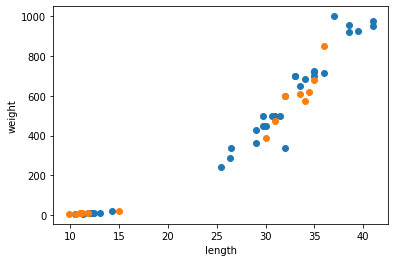

In [15]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:, 0], test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 두 번째 머신러닝 프로그램
fit()메서드는 실행할 때마다 객체는 이전에 학습한 모든 것을 잃어버리는 점 명심하라.

In [16]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

결과는 대성공이다. 100%의 정확도를 달성했으니 말이다.